# Table of Contents:
1. [Introduction](#section-one)

2. [Exploratory Data Analysis](#section-two)

3. [Data Preprocessing](#section-three)

4. [Building ANN](#section-four)

5. [Evaluating the model](#section-five)

6. [Hyperparameter tuning ANN](#section-six)

7. [Conclusion](#section-seven)

<a id="section-one"></a>
# Introduction
<img src="https://thumbs.gfycat.com/ActiveCourteousAmericanindianhorse-small.gif">
The deep learning have open the new era to increase the computational power of processing the dataset. Also it has paved way to process unstructured data such as image, audio and video data which normal machine learning models takes longer hours to train. With the help of neural networks and back propogation we can minimize the loss in our prediction and be more accurate.

## What is Deep Learning ?
<img src="https://miro.medium.com/max/1024/0*6XnccoRFvqi4GkXu.jpeg">
Deep learning is a part of Machine Learning where the model learns with the help of deep neural networks which resembles human brain. The complex data problems can be solved with the help of Deep learning soon.

## Image Classification
<img src="https://blog.edugrad.com/wp-content/uploads/2019/11/Image-classification-using-CNN.jpg">
If you give a human apple, he/she easily identifies that apple as a red fruit and names it 'Apple'. Internally the person's brain captures the image of apple and compares it with the historical images(training data) which the person has seen before and someone telling him apple(label). With the help of this data and label his brain has trained to classify any fruits given to him. The same can be fed to trained neural networks and it shall output us what is the name of the image.

## Acknowledgements
1. [Keras Documentation](https://keras.io/)
2. [A Gentle Introduction to ANN](https://www.kaggle.com/nareshbhat/fashion-mnist-a-gentle-introduction-to-ann)- Naresh Bhat
3. [Comprehensive Guide to ANN with Keras](https://www.kaggle.com/prashant111/comprehensive-guide-to-ann-with-keras)- Prashant Banerjee

## Problem statement
Here we have two datasets , one MNIST (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems and the other one is fashion MNIST which is also a large database on clothing apparels.Our work is to built an efficient deep learning model to identify handwritten digits and clothing accessories.

## Objectives of Project
The Objective of project involves-
1. Exploratory Data Analysis of MNIST
2. Data preprocessing
3. Building Deep learning model(ANN)
4. Evaluation of model


**Note:** This is my first deep learning project and I have considered Fashion MNIST and Digit MNIST dataset for practise.

## Importing Libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier


## Loading both datasets
Let's welcome our MNIST datasets

In [2]:
#Digit MNIST dataset
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()

#Fashion MNIST dataset
fashion_train=pd.read_csv("../input/fashionmnist/fashion-mnist_train.csv")
fashion_test=pd.read_csv("../input/fashionmnist/fashion-mnist_test.csv")

11493376/11490434 [==============================] - 0s 0us/step


## How does the image dataset look like?
You might think of dataset with only images in the train and test dataset, But computer doesn't understand images but numbers. Let's see how does it look

In [3]:
fashion_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In fashion mnist dataset, the label number doesn't mean the number itself but the id for the clothing accessory.We can get that image from the pixedl values given in the record. Each pixel values vary between 0 to 255. The higher intensity value(255) it resembles a color and lower intensity value(0) is white. There are many shades in between.

## Train test split-Fashion MNIST
We need to split our fashion MNIST dataset into input and label data. Our MNIST has already been extracted as X-y train test data, so no need to split that

In [4]:
X_train_fashion = fashion_train.drop('label',axis = 1)
y_train_fashion = fashion_train['label']
X_test_fashion = fashion_test.drop('label',axis = 1)
y_test_fashion = fashion_test['label']

<a id="section-two"></a>
# Exploratory Data Analysis


## Visualizing the numbers
Let's take a look at the images in each dataset. But before splitting in our fashion dataset the data format is in a dataframe and in such cases we can't view the images,so before that we are reshaping our dataframe and make them into array to get each images in the dataset

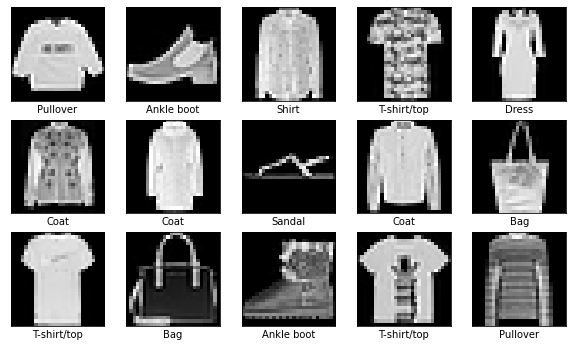

In [5]:
#Reshaping the dataset
x_train_reshape = X_train_fashion.values.reshape(-1,28,28)
x_test_reshape = X_test_fashion.values.reshape(-1,28,28)

#Names of clothing accessories in order 
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualizing the images
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i], cmap='gray')
    plt.xlabel(col_names[y_train_fashion[i]])
plt.show()

Here, we can see  the different types of clothing accessories for both men and women in fashion mnist

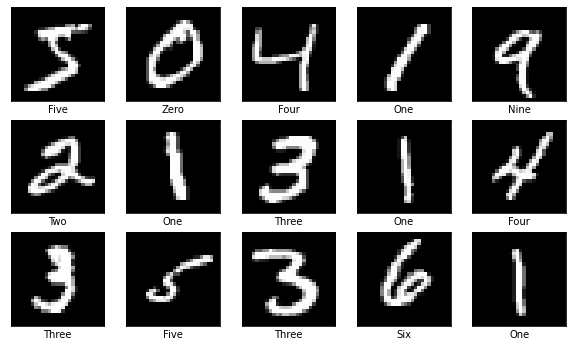

In [6]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

Here, we can see the handwrittten digits from the mnist dataset. If you notice all the handwritten records are different from each other which makes it challenging for the computer to predict, but neural network does it with ease

## Pixel intensity of images
We know the RGB will have values between 0 to 255 where 0 being the lowest intensity(black) and 255 being the highest(white). Let's check out the pixel intensity of each pixel with a help of amazing function taken from [Naresh Bhat's notebook](https://www.kaggle.com/nareshbhat/fashion-mnist-a-gentle-introduction-to-ann)

In [7]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='summer')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

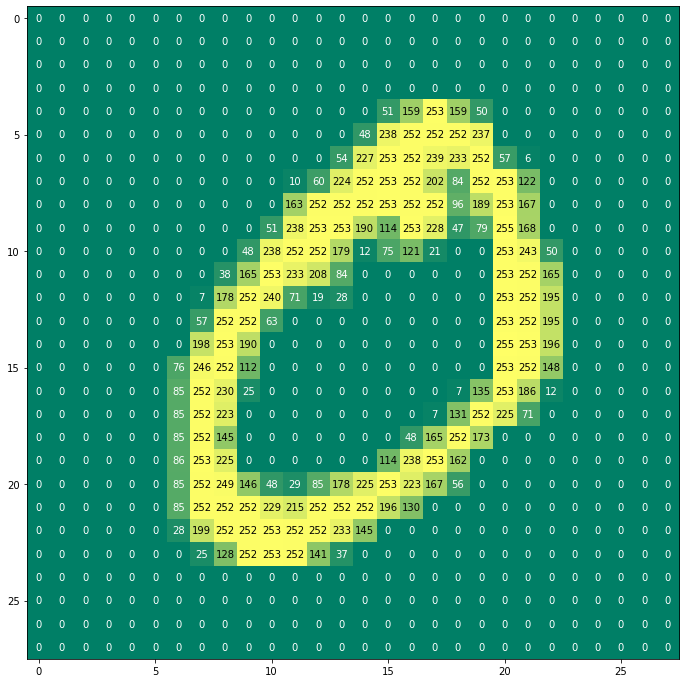

In [8]:
#Visualizing for digit MNIST
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train_digit[1], ax)
plt.show()

We took the '0' image and you can find all the highest intensity pixel ranging around 220-255 have bright colors and rest (green) have 0 intensity 

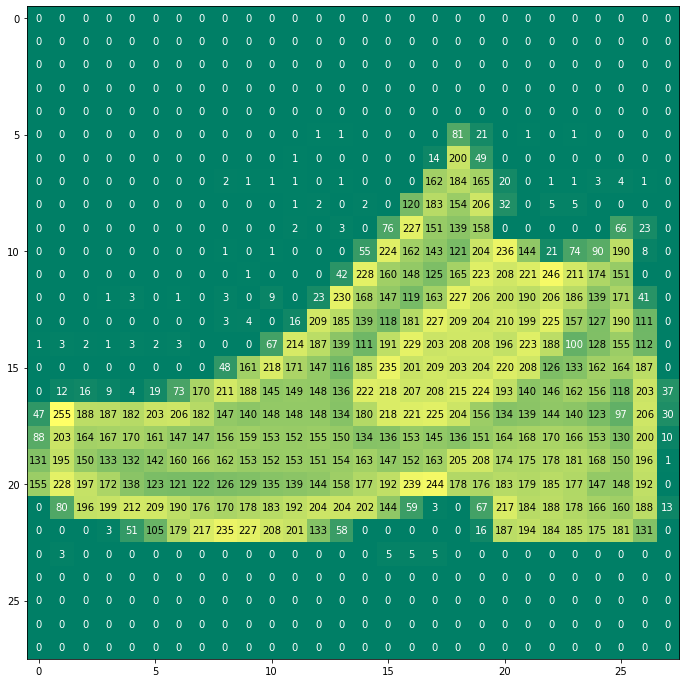

In [9]:
#Visualizing for Fashion MNIST
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(x_train_reshape[1], ax)
plt.show()

We took the shoe image and you can find all the highest intensity pixel ranging around 220-255 have bright colors and rest (green) have 0 intensity . Here there are also dull intensity pixels inside the object and it also has been captured

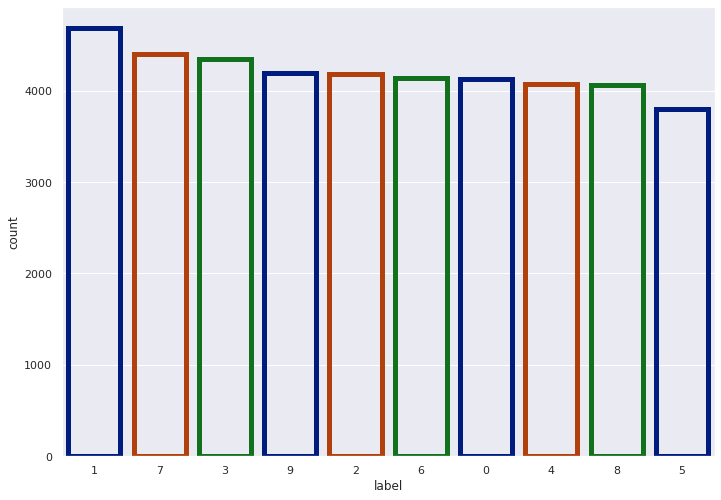

In [10]:
#Setting plot size
sns.set(rc={'figure.figsize':(11.7,8.27)})

#Getting dataframe data
mnist=pd.read_csv("../input/digit-recognizer/train.csv")

#Countplot
ax = sns.countplot(x="label", data=mnist,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3),
                   order = mnist['label'].value_counts().index)

**Insights:**
* The label of the MNIST dataset are well balanced. 
* The highest number of label is '1' followed by '7' and '3'.


There's no need to analyse fashion MNIST because the data has exactly 6000 records for each labels

<a id="section-three"></a>
# Data processing 

## Reshaping Digit MNIST
The shape of digit MNIST is extracted in 2D data which can't be fed to a neural network as it allows only 1D data, so we convert them with the help of reshape function. Lets cofirm by checking the dimensions of training data.

In [11]:
X_train_digit.ndim

3

Here the dimensions are showing as 3, where the first belongs to records followed by the 2D data. Let's check the shape

In [12]:
X_train_digit.shape

(60000, 28, 28)

In [13]:
X_test_digit.shape

(10000, 28, 28)

From the train shape we can see that we have (6000,28,28). Here 6000 is the number of records we have and 28X28 is the dimension of 2D data. Now it can be represented as 784(28X28) which is a 1 dimensional data. By converting into 1D we can feed the data to neural network for training. Now using reshape function,

In [14]:
X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit = X_test_digit.reshape(10000, 784)

In [15]:
X_train_digit.shape

(60000, 784)

## Encoding the labels

Our MNIST datasets have 10 classes each in both the datasets. Now, let's encode the label classes in the dataset with the help of to_categorical() function from Keras utils library. If the label is '5' it will encode to one in the fifth position of vector and so on for all the class labels. Let's see it visually

In [16]:
y_train_fashion[0]#

2

In [17]:
#Encoding Digit MNIST Labels
y_train_digit = to_categorical(y_train_digit, num_classes=10)

y_test_digit = to_categorical(y_test_digit, num_classes=10)


#Encoding Fashion MNIST Labels
y_train_fashion = to_categorical(y_train_fashion, num_classes=10)

y_test_fashion = to_categorical(y_test_fashion, num_classes=10)


In [18]:
y_train_fashion[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

From the result we can see that the number 2 is in activated in the second position of vector and thus it is encoded. This is similar to one hot encoding.

<a id="section-four"></a>
# Building Deep Learning model- Artificial Neural Network
<img src="https://miro.medium.com/max/2500/1*ZB6H4HuF58VcMOWbdpcRxQ.png">
Artificial Neural network resembles the brain's neural network with densely connected neurons in between input and output layers. It has a hidden layers where the internal processing happens in ANN. The neural network's objective is to minimise the loss(actual-predicted) by using the learning method called as back propogation where the weights get re-initialized in each connecting layer for many epochs through which the loss is minimised.

First lets build and compile an ANN model without any hyperparameter tuning and then we apply hyperparameter tuning to understand how the model accuracy improves

In this stage we follow 3 steps
1. Defining the model
2. Compile the model with loss function
3. Fitting the model to our data

## Defining the model
To define the model we need the Sequential() function which helps us to build the base neural network on that we have to decide the dense layers and neurons.

In [19]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                3096      
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24)                96        
_________________________________________________________________
dense_2 (Dense)              (None, 24)                6

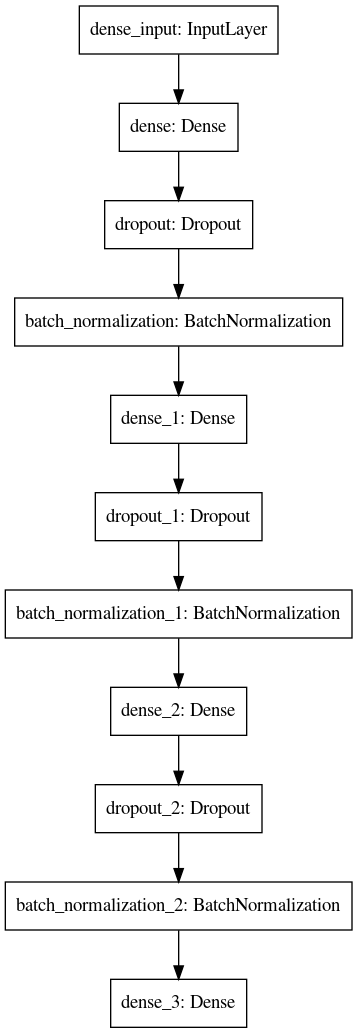

In [21]:
#Plotting the schema of neural network
keras.utils.plot_model(model)

* We have used relu activation function for the hidden layers and sigmoid for the output layer
* Since we didn't normalize our dataset we are using BatchNormalization() function to normalize in the neural network
* We are also considering the drop out layer in each hidden layers to reduce the chances of overfitting

## Compiling the model
The base model of neural network is ready. It's time to connect the brain for the neural network. In this part we tell the neural network on how to learn the model where we signify the type of loss function and which optimizer and metrics to use.

* Optimizer:
Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data. It doesn't take a constand learning rate like SGD, it adapts in changing learning rate in each cycle

* Loss function:
Categorical crossentropy is a loss function that is used in multi-class classification tasks. These are tasks where an example can only belong to one out of many possible categories, and the model must decide which one.Formally, it is designed to quantify the difference between two probability distributions.

* Metricss:
Accuracy is the ratio of number of correct predictions to the total number of input samples.

In [22]:
#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

## Fitting the model
Now, its time to train our neural network. Since we didn't use any hyperparameter training here. I'm just giving value for batch size and epochs myself which peformed better in this case

In [23]:
model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=30)

Epoch 1/30
600/600 [==============================] - 2s 3ms/step - loss: 1.4043 - accuracy: 0.6054
Epoch 2/30
600/600 [==============================] - 2s 3ms/step - loss: 0.6160 - accuracy: 0.8088
Epoch 3/30
600/600 [==============================] - 2s 3ms/step - loss: 0.4440 - accuracy: 0.8763
Epoch 4/30
600/600 [==============================] - 2s 4ms/step - loss: 0.3705 - accuracy: 0.9004
Epoch 5/30
600/600 [==============================] - 2s 3ms/step - loss: 0.3385 - accuracy: 0.9078
Epoch 6/30
600/600 [==============================] - 2s 3ms/step - loss: 0.3147 - accuracy: 0.9160
Epoch 7/30
600/600 [==============================] - 2s 3ms/step - loss: 0.3010 - accuracy: 0.9190
Epoch 8/30
600/600 [==============================] - 2s 3ms/step - loss: 0.2851 - accuracy: 0.9239
Epoch 9/30
600/600 [==============================] - 2s 3ms/step - loss: 0.2760 - accuracy: 0.9265
Epoch 10/30
600/600 [==============================] - 2s 3ms/step - loss: 0.2648 - accuracy: 0.9312

From the training results we can see that after just 30 epochs the accuracy has gained to approximately 95% and the loss value is 0.19 which is very good. We can expect a much better accuracy with hyperparameter tuning

In [24]:
#Creating base neural network
model2 = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='softmax'),
])

#Compiling the model
model2.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

#Fitting the model
model2.fit(X_train_fashion, y_train_fashion, batch_size=100, epochs=30)

Epoch 1/30
600/600 [==============================] - 2s 3ms/step - loss: 1.1238 - accuracy: 0.6134
Epoch 2/30
600/600 [==============================] - 2s 3ms/step - loss: 0.7473 - accuracy: 0.7463
Epoch 3/30
600/600 [==============================] - 2s 3ms/step - loss: 0.6702 - accuracy: 0.7743
Epoch 4/30
600/600 [==============================] - 2s 3ms/step - loss: 0.6299 - accuracy: 0.7881
Epoch 5/30
600/600 [==============================] - 2s 3ms/step - loss: 0.6125 - accuracy: 0.7936
Epoch 6/30
600/600 [==============================] - 2s 3ms/step - loss: 0.5992 - accuracy: 0.8004
Epoch 7/30
600/600 [==============================] - 2s 4ms/step - loss: 0.5845 - accuracy: 0.8052
Epoch 8/30
600/600 [==============================] - 2s 3ms/step - loss: 0.5696 - accuracy: 0.8079
Epoch 9/30
600/600 [==============================] - 2s 3ms/step - loss: 0.5607 - accuracy: 0.8127
Epoch 10/30
600/600 [==============================] - 2s 3ms/step - loss: 0.5514 - accuracy: 0.8154

For the fashion MNIST dataset we got the accuracy of 83% and the loss is around 0.5 which is good but can be made better with hyperparameter tuning or CNN network. Let's evaluate both the model with test data

<a id="section-five"></a>
# Evaluation of Model

## Test accuracy
Now it's time to check how our model performs when it gets unseen data. We have evaluate() function from keras for evaluating our trained model, let's use that to get the test accuracy of both the datasets

In [25]:
#Evaluating digit MNIST test accuracy
test_loss_digit, test_acc_digit = model.evaluate(X_test_digit, y_test_digit)

#Evaluating fashion MNIST test accuracy
test_loss_fashion, test_acc_fashion = model2.evaluate(X_test_fashion, y_test_fashion)

313/313 [==============================] - 1s 2ms/step - loss: 0.3648 - accuracy: 0.8726


In [26]:
#Printing the test accuracy results
print('Digit MNIST Test accuracy:', round(test_acc_digit,4))

print('Fashion MNIST Test accuracy:', round(test_acc_fashion,4))

Digit MNIST Test accuracy: 0.9746
Fashion MNIST Test accuracy: 0.8726


From the results we can see that digit MNIST data has performed better(97%) on test data compared to the fashion MNIST data(87%). But the situation may change after using hyperparameter tuning. Let's display the confusion matrix

## Confusion Matrix

Let's see how many labels where classified right and how many were misclassified

In [27]:
#Predicting the labels-DIGIT
y_predict = model.predict(X_test_digit)
y_predict=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

#Predicting the labels-Fashion
y_predict_fash = model2.predict(X_test_fashion)
y_predict_fash=np.argmax(y_predict_fash, axis=1)
y_test_fash_eval=np.argmax(y_test_fashion, axis=1)

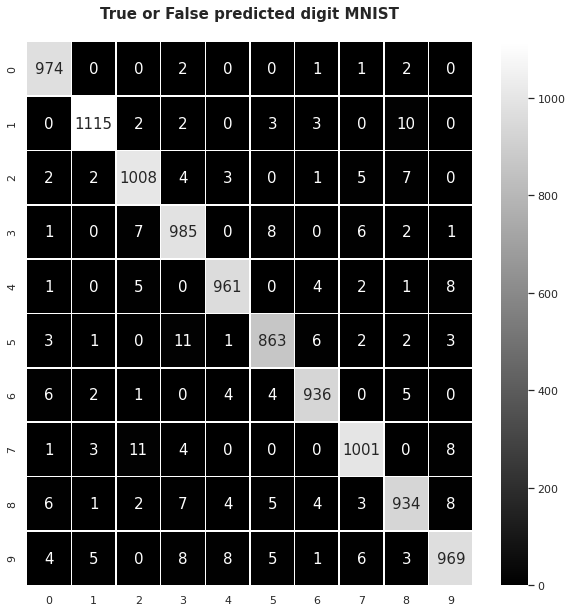

In [28]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_digit_eval,y_predict)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

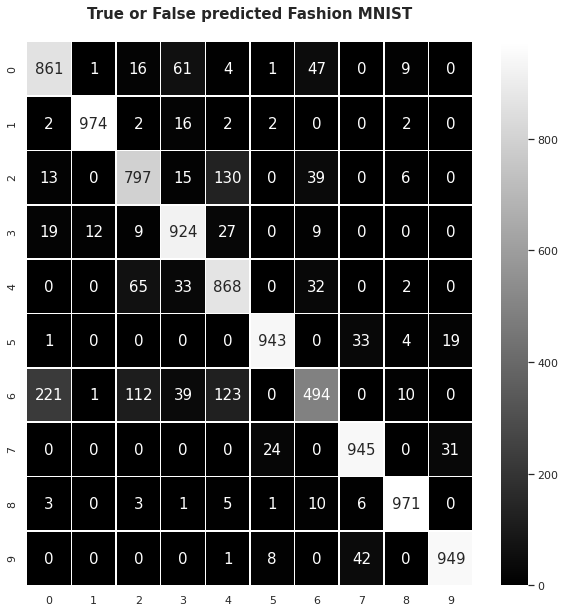

In [29]:
#Confusion matrix for Fashion MNIST
con_mat=confusion_matrix(y_test_fash_eval,y_predict_fash)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted Fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()

From the results we can see that both the matrix show a positive result of having most of the labels classified right and there were very few labels which has been misclassified(numbers which are not in the diagonal part).

If you notice digit mnist model has done an impeccable work compared to fashion mnist. In fashion mnist label 6 product was classified incorrectly when compared to the rest.

Let's now try hyperparameter tuning and see whether it gets improved.

<a id="section-six"></a>
# Hyperparameter tuning in ANN
Hyperparameters are the variables which determines the network structure(Eg: Number of Hidden Units) and the variables which determine how the network is trained(Eg: Learning Rate).Hyperparameters are set before training(before optimizing the weights and bias). We have a lot of parameters when it comes to 

1. Number of layers
2. Number of neurons in each layers
3. Batch Size
4. Epochs
5. Optimizer
6. Loss function 
7. Activation

Note : I'm not covering hyperparameter tuning for all the params since it will have high computation and it requires a good device with better workstation to run it smoothly. 

## Digit MNIST- Hyperparameter tuning

Now, lets set hyperparameter for Digit MNIST model and repeat the same for Fashion MNIST

In [30]:
#Function for the base neural network
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train_digit.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units = 10, kernel_initializer= 'glorot_uniform', activation = 'softmax')) 
    
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [31]:
#Using Keras classifier to apply the function
model3 = KerasClassifier(build_fn=create_model, verbose=0)

#Tuning the layers, activation function and batch sizes
layers = [(20,), (40, 20), (45, 30, 15)]
activations = ['sigmoid', 'relu','softmax']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])

#Using GridSearchCV to fit the param dictionary
grid = GridSearchCV(estimator=model3, param_grid=param_grid,cv=5)

In [32]:
#Fitting the params with the training data to figure out the best params and accuracy score
grid_result = grid.fit(X_train_digit, y_train_digit)

print(grid_result.best_score_,grid_result.best_params_)

0.9075000047683716 {'activation': 'sigmoid', 'batch_size': 256, 'epochs': 30, 'layers': (40, 20)}


We have got the best score as 91% and params where we select sigmoid as activation function with 256 batch size and 40,20 hidden layers

## Evaluation of model after Hyperparameter tuning

We have got a pretty good result. let's evaluate the tuned model with our test data

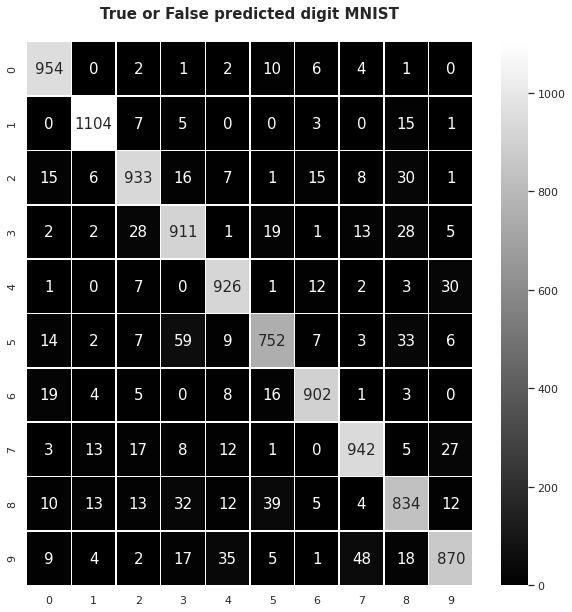

In [33]:
#Predicting from the params we got from grid search cv
pred_y = grid.predict(X_test_digit)

y_test_digit=np.argmax(y_test_digit, axis=1)

#Confusion matrix
con_mat=confusion_matrix(y_test_digit,pred_y)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [34]:
#Accuracy score 
score=accuracy_score(pred_y,y_test_digit)
print(score)

0.9128


We have got 91% accuracy which is quite poor when compared to the one without hyperparamter tuning. It could be due to the fact that I havent  dropout layers here.

## Fashion MNIST- Hyperparameter tuning

It's time to tune our fashion MNIST model

In [35]:
def create_model_fash(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train_fashion.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units = 10, kernel_initializer= 'glorot_uniform', activation = 'softmax')) 
    
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [36]:
#Using Keras classifier to apply the function
model4 = KerasClassifier(build_fn=create_model_fash, verbose=0)

#Tuning the layers, activation function and batch sizes
layers = [(20,), (40, 20), (45, 30, 15)]
activations = ['sigmoid', 'relu','softmax']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])

#Using GridSearchCV to fit the param dictionary
grid = GridSearchCV(estimator=model4, param_grid=param_grid,cv=5)

In [37]:
#Fitting the params with the training data to figure out the best params and accuracy score
grid_result = grid.fit(X_train_fashion, y_train_fashion)

print(grid_result.best_score_,grid_result.best_params_)

0.7790499925613403 {'activation': 'sigmoid', 'batch_size': 256, 'epochs': 30, 'layers': (20,)}


We have got onlu 78% on accuracy which is poor compared to the one without hyperparameter tuning. There is only one hidden layer which was chosen with the sigmoid activation and there is no drop out layer here as well.

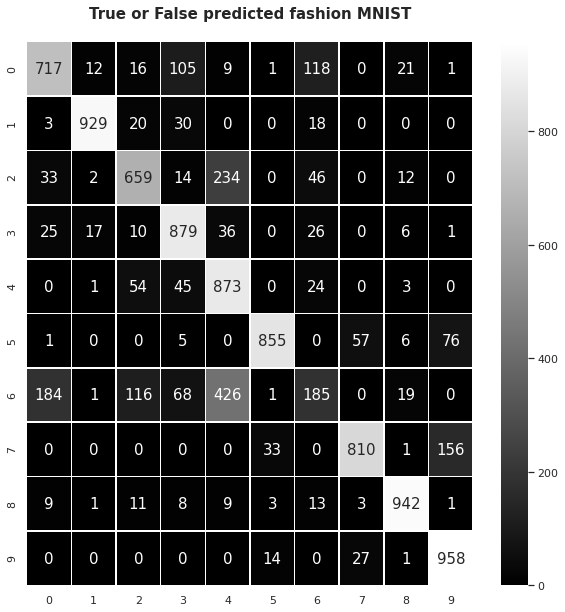

In [38]:
#Predicting from the params we got from grid search cv
pred_y = grid.predict(X_test_fashion)

y_test_fashion=np.argmax(y_test_fashion, axis=1)

#Confusion matrix
con_mat=confusion_matrix(y_test_fashion,pred_y)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [39]:
#Accuracy score 
score=accuracy_score(pred_y,y_test_fashion)

print(score)

0.7807


We have got a 73% test accuracy from Fashion MNIST model after tuning . You can notice that label 6 and 4 products have been misclassified alot.You can try by tuning with more adding more in parameter dictionary and get better results than this

<a id="section-seven"></a>
# Conclusion
<img src="https://miro.medium.com/max/1200/0*4aHRjVXRKsyUhm2b">
We have arrived at the conclusion where I would like to recap what we did in our project. We took two popular MNIST datasets and preprocessed it. We later fed into Artificial Neural network by creating one. Also we performed hyperparameter tuning in ANN and got the best accuracy. Before signing off, I would like to point out the stuff which can be done further

1. More parameters can be tuned 
2. Hyperparameter tuning can also be done on selecting the number of neurons
3. Can perform techniques such as early stopping and batch normalization

I thank everyone for reading the whole notebook. If you have any critical feedback or suggestions to my work, please drop them in the comments. 


## You can find my [other notebooks here ](https://www.kaggle.com/benroshan/notebooks)